<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday March 4**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [68]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: The Game of Strife

Below, and at the [link here](http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png), you will find the board for the ***Game of Strife***, a simplified and slightly more depressing version of the [Game of Life](https://en.wikipedia.org/wiki/The_Game_of_Life). Here are some rules:

- Players begin at START and may choose to begin the game by either going to college (moving to the right from START) or starting a career (moving downward from START). Players then move along the game board in order of increasing tile number. 
    - If a player begins by going to college, then they start the game with -\$20,000. That is indeed negative money, to account for student loan debt.
    - If a player begins by starting a career, then they start the game with \$5,000.

<p> </p>

- At the beginning of a player's turn, they roll a fair 6-sided die, the outcome of which determines how many tiles they move forward.

<p> </p>

- When a player reaches a red square (tiles 9, 17 or 30), they must stop at that square for the rest of their turn, even if they would not have landed on the red square.
    - When a player stops on the CAREER tile after college (square 9), they are randomly assigned a career and salary from the possibilities: \$50,000, \$70,000, \$90,000, \$110,000, or \$130,000 (all with equal probability). The player's actual career is irrelevant to the game, but please make something up so you are emotionally invested in the game.
    - If a player starts a career at the beginning of the game, they are assigned a salary randomly from possibilities \$40,000, \$50,000, \$60,000, \$70,000, or \$80,000.
    - When a player stops on the HOUSE tile, they put a down payment on a house. This down payment is drawn randomly from the set \$25,000, \$40,000, \$55,000 or \$70,000.
    - When a player stops on the RETIRE tile, the player collects a pension equal to half their salary and then the game ends immediately.

<p> </p>

- When a player lands on or passes a PAYDAY square, they earn money equal to their salary.

<p> </p>

- When a player lands on a STRIFE square (1, 4, 7, 13, 18, 23 or 29 if they go to college, or 2, 7, 13, 18, 23 or 29 if they start a career immediately at the beginning of the game), they draw a STRIFE card. The STRIFE cards have the player earn \$5,000 or \$10,000, or lose \$1,000, \$2,000 or \$5,000.

<p> </p>

- Players can have negative money, which corresponds to being in debt.


<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png" style="width: 700px;"/>

**Part A:** Write code to simulate an entire game of the Game of Strife (with only one player). You may **not** have two separate routines for simulating the game, or a turn, depending on whether a player goes to college or starts a career at the beginning; both possibilities should be accounted for within your one set of codes.

Then run two ensembles of at least 10,000 games, one where the player starts by going to college, the other where the player starts a career immediately. Plot density histograms of the players' ending distributions of money on the same set of axes. Be sure to label your axes, include a legend and make your histogram box faces slightly transparent, so both sets of data are visible.

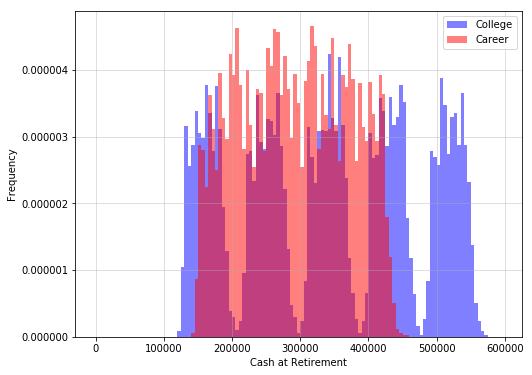

In [69]:
NUM_TRIALS = 10000
college_money = []
career_money = []
hit = False
# this function checks if the player passed a payday spot and returns the amount necessary
def is_payday(college, sal, pos, past):
    # if you start with a career and pass the 4 spot, return sal
    if (college == 'career' and past < 4 and pos >= 4):
        return sal
    # the one case where you can start at 21, roll a 6 and pass two salary spots
    elif (past == 21 and pos-past == 6):
        return sal * 2
    else:
        for spot in [10,16,22,27]:
            if (past < spot and pos >= spot):
                return sal
    return 0

# this function assigns the player a salary at the necessary time in the game
def start_career(college):
    if (college == 'college'):
        return np.random.choice([5,7,13,9,11]) * 10000
    else:
        return np.random.choice([4,5,6,7,8]) * 10000
    
# this function checks if the current spot is a strife spot based on the career or college choice
def is_strife(college, pos):
    global hit
    strife_spot = {
        'college': [1,4,7,13,18,23,29],
        'career' : [2,7,13,18,23,29]
    }
    if (pos in strife_spot[college]):
        hit = True
        return np.random.choice([5000, 10000, -1000, -2000, -5000])
    else:
        return 0

# this function drives the strife turn
def strife_turn(pos, money, college, sal,done):
    past = pos
    # get the roll for the current turn
    roll = np.random.choice([1,2,3,4,5,6])
    pos += roll
    # if you pass/ land on the HOUSE spot, pay the down payment and stay on spot 17
    if(past < 17 and pos >= 17):
        money -= np.random.choice([25000,40000,55000,70000])
        pos = 17
    
    #check if the spot is a strife spot or if you past a payday spot in funcs above
    money += is_strife(college, pos)
    money += is_payday(college, sal, pos, past)
    
    #check if the position is career spot 9
    if (pos >= 9 and college == 'college' and sal == 0):
        # assign the player a salary and make them stop
        pos = 9
        sal = start_career(college)
    
    # if you have rolled past the end of the game collect your pension, don your Tommy Bahama shirt and kick back!!
    if(pos >= 30):
        money += sal // 2
        done = True
        return pos, money, college, sal, done
    return pos, money, college, sal, done

def play_game(choice):
    money = 0
    sal = 0
    pos = 0
    done = False
    hit = False
    #choice = np.random.choice(['college', 'career'])
    if (choice == 'college'):
        money = -20000
    else:
        money = 5000
        sal = start_career(choice)
    while (not done):
        pos, money, choice, sal, done = strife_turn(pos, money, choice, sal, done)
    return money

def run_sim():
    global college_money
    global career_money
    my_bins = range(0, 600000, 5000)
    college_money = [play_game('college') for _ in range(NUM_TRIALS)]
    career_money = [play_game('career') for _ in range(NUM_TRIALS)]
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    _ = ax.hist(college_money, label='College', bins = my_bins, color='Blue', alpha=0.5, density=True)
    _ = ax.hist(career_money, label='Career', bins=my_bins, color='Red', alpha=0.5, density=True)
    _ = ax.set_xlabel('Cash at Retirement')
    _ = ax.set_ylabel('Frequency')
    _ = ax.legend(loc='upper right')
    _ = ax.grid(alpha=0.5)
    
_ = run_sim()

**Part B:** Use concepts from class to describe the two distributions of player cash at retirement, depending on whether or not they went to college or immediately started a career. How are the two distributions similar? How do they differ? Address characteristics like skew, modality, central tendency and spread. How could the rules of the Game of Strife account for these differences?

**Answer B**
<br> At retirement, these distributions look a little similar but there are some very distinct differences. The first one that I noticed being that the distribution for games where the player chose to go to college is multimodal. From the graph above, it looks to have 5 different peaks. The spread of these two distributions are pretty similar ranging from around 100,000 dollars to around 450,000 dollars. Neither of the distributions seem particularly or obviously skewed in one direction or another. The career distribution is more uniform than the college distribution with multiple modes that are less distinct than the college distribution. In other words, the career distribution is more uniform than the college distribution and has a smaller spread due to the lack of multiple distinct peaks. The Game of Strife may account for the differences in distributions because when you start the game and go to college, you start with -20,000 dollars so it may be more likely for you to earn various ranges of money by the end of the game based on your turns and luck hence the very distinct modes in the histogram above. Another explanation might be that each mode responds to being assigned a different salary. 

**Part C:**  Use your results from Part A to estimate the probability that a person would retire with at least \$300,000, if they went to college.

In [70]:
#This function finds the number of games that ended with the player having over $300k.
def run_sim_C():
    success = np.sum([play_game('college') >= 300000 for ii in range(NUM_TRIALS)])
    print("The probability that you retire with at least $300,000 if you went to college is: {0:.2%}".format(success / NUM_TRIALS))

run_sim_C()

The probability that you retire with at least $300,000 if you went to college is: 59.88%


**Part D:** The United States [Bureau of Labor Statistics](https://www.bls.gov/news.release/hsgec.nr0.htm) has found that approximately 66.7% of students go to college. Suppose players of the Game of Strife choose to go to college at the beginning of the game with this probability of $P(\text{college}) = 0.667$.

Use your two ensembles of games from Part A to estimate the probability that an individual, whose college education status is unknown, will retire in the Game of Strife with at least \$300,000. State any relevant probability laws, theorems or rules that you use, and show all calculations.

In [71]:
# The below function uses the Law of Total Probability to find the probability that you end the game with 300k regardless of prior life choices.
def end_game():
    p_col = 0.667
    #find # of successes for players who went to and didnt go to college.
    p_colsuc = np.sum(np.fromiter(college_money, float) >= 300000) / NUM_TRIALS
    p_carsuc = np.sum(np.fromiter(career_money, float) >= 300000) / NUM_TRIALS
    print("P(College): {0:.2%}".format(p_col))
    print("P(Career): {0:.2%}".format(1-p_col))
    print("P(300k | College): {0:.2%}".format(p_colsuc))
    print("P(300k | Career): {0:.2%}".format(p_carsuc))
    print("\nWe can use the law of total probability and the values above to calculate the probability that you retire "
          "with at \nleast 300k regardless of knowledge of life choices.")
    print("\nP(300k) = P(300k | College)P(College) + P(300k | Career)P(Career)")
    print("P(300k) = {0:.4f} * {1:.4f} + {2:.4f} * {3:.4f}".format(p_colsuc, p_col, p_carsuc, 1-p_col))
    print("P(300k) = {0:.2%}".format((p_colsuc * p_col) + (p_carsuc * (1-p_col))))
end_game()

P(College): 66.70%
P(Career): 33.30%
P(300k | College): 60.61%
P(300k | Career): 46.43%

We can use the law of total probability and the values above to calculate the probability that you retire with at 
least 300k regardless of knowledge of life choices.

P(300k) = P(300k | College)P(College) + P(300k | Career)P(Career)
P(300k) = 0.6061 * 0.6670 + 0.4643 * 0.3330
P(300k) = 55.89%


**Answer D**
<br>The above cell utilizes the law of total probability to calculate the probability that a player retires with at least 300,000 dollars without any knowledge of whether or not they went to college or not using the values found in (A) from earlier. The expansion below is used in the above calculation.
$$
\begin{align} \\
P(300k) &= P(300k \mid College)P(College) + P(300k \mid Career)P(Career) \\
P(300k) &= 55.56\%
\end{align}
$$

**Part E:** Let's see how important the Strife tiles are in affecting a player's final money. What is the probability that a player ends the game with at least \$300,000 in cash if they landed on at least one Strife square? You may want to modify your previous codes to run additional simulations for this part. Use the same method as Part D to address the proportion of players who begin by going to college versus starting a career.

In [72]:
# This function finds the probability you retire with at least 300k if you hit a strife spot.
def run_sim_E():
    ii = NUM_TRIALS
    p_col = 0.667
    college_money = []
    career_money = []
    # this loop increments downwards only when you hit a strife spot so you only get data from games that you hit the spot
    while ii > 0:
        ret = play_game('college')
        if (hit):
            college_money.append(ret)
            ii -= 1
    ii = NUM_TRIALS
    # do the same loop above but for choosing a career instead of college to start.
    while ii > 0:
        ret = play_game('career')
        if (hit):
            career_money.append(ret)
            ii -= 1
    # find probabilities of success for each scenario
    p_col_suc = np.sum(np.fromiter(college_money, float) >= 300000) / NUM_TRIALS
    p_car_suc = np.sum(np.fromiter(career_money, float) >= 300000) / NUM_TRIALS
    # use LTP to calculate the percentage we want
    print("Using the same method as part D (Law of Total Probability) we can calculate the probability that"
          " a player ends the game with at least $300,000 given that they hit at least one strife spot.")
    print("P(300k) = P(300k | College)P(College) + P(300k | Career)P(Career)")
    print("P(300k) = {0:.4f} * {1:.4f} + {2:.4f} * {3:.4f}".format(p_col_suc, p_col, p_car_suc ,1-p_col))
    print("P(300k) = {0:.2%}".format((p_col_suc * p_col) + (p_car_suc * (1-p_col))))
    
run_sim_E()

Using the same method as part D (Law of Total Probability) we can calculate the probability that a player ends the game with at least $300,000 given that they hit at least one strife spot.
P(300k) = P(300k | College)P(College) + P(300k | Career)P(Career)
P(300k) = 0.6058 * 0.6670 + 0.4717 * 0.3330
P(300k) = 56.11%


<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sonic or Tails?

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg" style="width: 500px;"/>

In the file `flipadelphia.csv` you will find the results of an experiment that was conducted by Amy, the famous hedgehog data scientist, as she was flipping a coin one sunny day in a meadow. This is no ordinary coin, however: this coin has on one side Sonic, and on the other side Tails! The two sides of this coin are above, and at [this link](http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg).

In Amy's experiment she repeatedly flipped the coin until it came up Sonic. After each trial, she recorded her observed value for $X=$ the number of flips required to see the first Sonic. The results are stored in `flipadelphia.csv`.

Amy has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Amy is a forgetful hedgehog, so she isn't sure which coin she was flipping. Her coins have biases of $p_S=.2, .3, .4, .5, .6, .7$ and $.8$, where $p_S$ is the probability of any given flip coming up Sonic.

**Part A:** Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). What is the name of the distribution for the random variable that Amy observed and recorded in her data table?

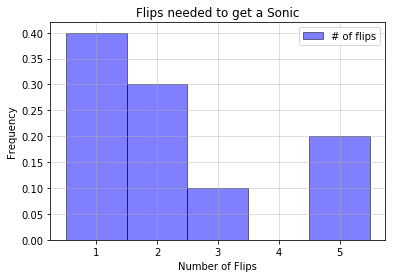

In [73]:
# read in the data and make a frequency histogram
df = pd.read_csv('flipadelphia.csv', header=None)
fig, ax = plt.subplots(1,1)
_ = ax.hist(df[0], label='# of flips', color='blue', alpha=0.5, edgecolor='black', bins=np.arange(1,7)-0.5, density=True)
_ = ax.set_title('Flips needed to get a Sonic')
_ = ax.set_xlabel('Number of Flips')
_ = ax.set_ylabel('Frequency')
_ = ax.grid(alpha=0.5)
_ = ax.legend(loc='upper right')

**Answer A**
<br>The distribution represented by the above data is a geometric distribution. This is because $X =$ the number of trials before our first "success" and each flip is a Bernoulli trial with two distinct outcomes: Success or Failure.

**Part B:** Use the distribution that you identified in Part A to determine $P(X=n \mid p_S=0.5)$, the probability that Amy would observe the first Sonic flip on the $n$-th flip, assuming that the coin is fair ($p_S=0.5$), for each of the $n$ from her 10 trials in her data set. Then, combine these to find the overall *likelihood* that she would observe her entire data set, assuming that the coin was fair. That is, estimate $P(\text{data} \mid p_S=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Amy's data set consists of the results of all 10 of her trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{10} = n_{10})$$

In [77]:
# get pmf value for all values in df using p_s = 0.5
pmf_val = [stats.geom.pmf(i,0.5) for i in df[0]]
print("Probabilities for random variable X=num_trials: ")
for x in range(len(pmf_val)):
    print("P(X={0}) = {1:.4f}".format(df[0][x], pmf_val[x]))
# use the product of the individual pmf values to find the probability that you exactly get Amy's data
print("P(data | ps = 0.5) = {}".format(np.prod(pmf_val)))

Probabilities for random variable X=num_trials: 
P(X=1) = 0.5000
P(X=5) = 0.0312
P(X=1) = 0.5000
P(X=5) = 0.0312
P(X=2) = 0.2500
P(X=2) = 0.2500
P(X=3) = 0.1250
P(X=2) = 0.2500
P(X=1) = 0.5000
P(X=1) = 0.5000
P(data | ps = 0.5) = 1.1920928955078125e-07


**Part C:** Suppose before we observed Amy's data set, we believe that each of the seven possible coin biases occur with equal probability, $P(p_S)$. This is called the _prior distribution_ for the coin bias, $p_S$, because we have not yet taken into account Amy's data set.
* Now, estimate the probability of each possible bias, given the data: $P(p_S \mid \text{data})$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Amy's data.
* Make a line plot of the bias along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. 
* Comment on your plot. What appears to be the most probable value for the bias, $p_S$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution and sounds very, *very* fancy.

$$
\begin{align}
P(p_s \mid data) &= \frac{P(data \mid p_s)P(p_s)}{P(data)} \\
P(data \mid p_s) &= P(p_s)p_s^{10}\Big(1-p\Big)^{13} \\
P(data) &= P(p_s) \Bigg(P(data \mid 0.2) + P(data \mid 0.3) + P(data \mid 0.4) + P(data \mid 0.5) + P(data \mid 0.6) + P(data \mid 0.7) + P(data \mid 0.8)\Bigg) \\
P(p_s \mid data) &= \frac{p_s^{10}\Big(1-p\Big)^{13}}{P(data \mid 0.2) + P(data \mid 0.3) + P(data \mid 0.4) + P(data \mid 0.5) + P(data \mid 0.6) + P(data \mid 0.7) + P(data \mid 0.8)} \\
P(p_s \mid data) &= \frac{p_s^{10}\Big(1-p\Big)^{13}}{0.00000000563 + 0.00000005721 + 0.00000013695 + 0.00000011921 + 0.00000004058 + 0.00000000450 + 0.00000000009} \\
P(p_s \mid data) &= \frac{p_s^{10}\Big(1-p\Big)^{13}}{.000000364177} \\
\end{align}
$$

P(0.2 | data) = 0.015458
P(0.3 | data) = 0.157102
P(0.4 | data) = 0.376062
P(0.5 | data) = 0.327344
P(0.6 | data) = 0.111426
P(0.7 | data) = 0.012367
P(0.8 | data) = 0.000242


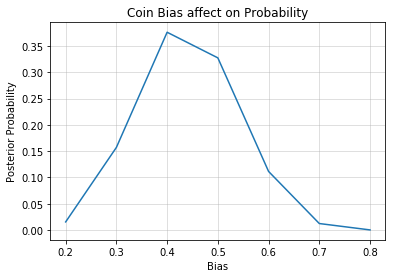

In [75]:
# This code chunk does the above calculation
ps = np.array([.2,.3,.4,.5,.6,.7,.8])
p_data = []
p_data_ps = []
for prob in ps:
    # get the pmfs for each coin bias
    pmf_val = [stats.geom.pmf(i,prob) for i in df[0]]
    # get the product and append to list of P(data | p_s) for each p_s
    p_data.append(np.prod(pmf_val))
# sum the P(data | p_s) to get P(data) by LTP
p_data = np.sum(p_data)

# perform Bayes Theorem calculation for each coin bias
for prob in ps:
    p_data_ps.append((((prob)**10) * ((1-prob)**13)) / p_data)
    print("P({0:} | data) = {1:.6f}".format(prob, p_data_ps[-1]))
#plot the posterior probability for each different coin bias
fig, ax = plt.subplots(1,1)
_ = ax.plot(ps, p_data_ps)
_ = ax.grid(alpha=0.5)
_ = ax.set_xlabel('Bias')
_ = ax.set_ylabel('Posterior Probability')
_ = ax.set_title('Coin Bias affect on Probability')

**Answer C**
<br>The most probable bias is $p_s = 0.4$ which yields the highest probability of getting the data that Amy did.

**Part D:** Now suppose the prior probability distribution of the coins is not uniform. Namely, suppose these probabilities follow a ***triangular distribution***, centered at $p_S=0.5$:
$$P(p_S = p) = \begin{cases} mp & p \leq 0.5 \\ m(1-p) & p > 0.5 \end{cases}$$

Determine what value the constant $m$ should have in order to make $P(p_S = p)$ is a valid probability mass function. Remember, $p_S \in \{.2, .3, \ldots , .7, .8\}$ and is discrete.

**Answer D**
<br>For this to be a valid probability mass function we know:
1. $\sum_x f(x) = 1$
2. $f(x) >= 0 \>\>\forall x$

$$
\begin{align}
P(p_s = 0.2) &= 0.2m \\
P(p_s = 0.3) &= 0.3m \\
P(p_s = 0.4) &= 0.4m \\
P(p_s = 0.5) &= 0.5m \\
P(p_s = 0.6) = (1-0.6)m &= 0.4m \\
P(p_s = 0.7) = (1-0.7)m &= 0.3m \\
P(p_s = 0.8) = (1-0.8)m &= 0.2m \\
\end{align} \\
\text{Now we add all the above values together and set them equal to 1: } \\
1 = m(0.2 + 0.3 + 0.4 + 0.5 + 0.4 + 0.3 + 0.2) \\
1 = m(2.3) \\
m = 0.43478
$$
<br>For the above value $m = 0.43478$ we satisfy both conditions for a valid probability mass function.

**Part E:** Compare, using words, the triangular prior distribution (this part) and the uniform prior distribution (from Part C).  What does each represent in terms of our _prior_ knowledge of the coin bias?

**Answer E**
<br>For our triangular prior distribution, the probability mass is more heavily distributed in a certain range as opposed to the uniform distribution where every $p_s$ has the same probability that it is used. The triangular distribution has the same sum of all values of the pmf for all values of $p_s$ but because it comes to a point graphically, the probability masses around that point have a higher weight associated with them and will thus have a higher probability of being the value for $P(p_s)$ our prior. In other words, the weights $p_s$ closer to the point of the triangular distribution have a higher probability of being our prior.

**Part F:** Modify your calculation of the posterior distribution from Part C to use the new triangular prior distribution from Part D. Make a plot of the results that includes both posterior distribution using the uniform prior (from Part C) and the posterior distribution using the triangular prior (from Part D) in the same figure panel. Be sure to label your axes and include a legend.

We can use the same rationale as (C) but our triangular distribution to compute $P(p_s)$.

$$
P(p_s \mid data) = \frac{P(data \mid p_s)P(p_s)}{P(data)} \\
\begin{align}
P(data) &= P(p_s) \Big(P(data \mid 0.2) + P(data \mid 0.3) + P(data \mid 0.4) + P(data \mid 0.5) + P(data \mid 0.6) + P(data \mid 0.7) + P(data \mid 0.8)\Big) \\
P(data) &= (0.43478) \Big(P(data \mid 0.2) + P(data \mid 0.3) + P(data \mid 0.4) + P(data \mid 0.5) + P(data \mid 0.6) + P(data \mid 0.7) + P(data \mid 0.8)\Big) \\
P(data) &= (0.43478) \Big( (0.2)(0.00000000563) + (0.3)(0.00000005721) + (0.4)(0.00000013695) + (0.5)(0.00000011921) + (0.4)(0.00000004058) + (0.3)(0.00000000450) + (0.2)(0.00000000009)\Big) \\
P(data) &= 6.5336 \times 10^{-8}
\end{align} \\
P(0.2 \mid data) = \frac{(0.43478)(0.2)(0.00000000563)}{6.5336 \times 10^{-8}} = \frac{4.8956 \times 10^{-10}}{6.5336 \times 10^{-8}} = 0.007493 \\
P(0.3 \mid data) = \frac{(0.43478)(0.3)(0.00000005721)}{6.5336 \times 10^{-8}} = \frac{7.4621 \times 10^{-9}}{6.5336 \times 10^{-8}} = 0.1142 \\
P(0.4 \mid data) = \frac{(0.43478)(0.4)(0.00000013695)}{6.5336 \times 10^{-8}} = \frac{2.3817 \times 10^{-8}}{6.5336 \times 10^{-8}} = 0.3645 \\
P(0.5 \mid data) = \frac{(0.43478)(0.5)(0.00000011921)}{6.5336 \times 10^{-8}} = \frac{2.5915 \times 10^{-8}}{6.5336 \times 10^{-8}} = 0.3966 \\
P(0.6 \mid data) = \frac{(0.43478)(0.4)(0.00000004058)}{6.5336 \times 10^{-8}} = \frac{7.0573 \times 10^{-9}}{6.5336 \times 10^{-8}} = 0.1080 \\
P(0.7 \mid data) = \frac{(0.43478)(0.3)(0.00000000450)}{6.5336 \times 10^{-8}} = \frac{5.8695 \times 10^{-10}}{6.5336 \times 10^{-8}} = 0.008984 \\
P(0.8 \mid data) = \frac{(0.43478)(0.2)(0.00000000009)}{6.5336 \times 10^{-8}} = \frac{7.8260 \times 10^{-12}}{6.5336 \times 10^{-8}} = 0.0001198 \\
$$


P(p_s | data) with triangular distribution: 
P(0.2 | data) = 0.007492
P(0.3 | data) = 0.114215
P(0.4 | data) = 0.364536
P(0.5 | data) = 0.396638
P(0.6 | data) = 0.108011
P(0.7 | data) = 0.008991
P(0.8 | data) = 0.000117


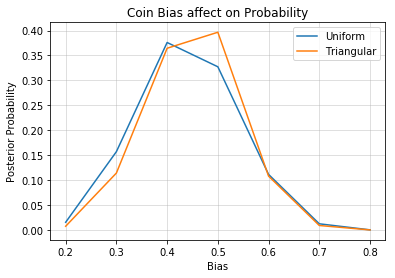

In [76]:
# triangular distribution function
def tri_dist(ps):
    if (ps <= 0.5):
        return 0.43478 * ps
    else:
        return 0.43478 * (1-ps)

# this code does the same Bayes theorem calculation from (C) but with the triangular distribution
p_tri = []
p_data_tri = []
pmf_val = []
for prob in ps:
    # get the pmf value for the each coin probability
    pmf = [stats.geom.pmf(i, prob) for i in df[0]]
    pmf_val.append(np.prod(pmf))
    # multiply the product of the pmfs by the triangularly distributed p_s
    p_tri.append(np.prod(pmf) * tri_dist(prob))
# sum the probabilities found above to get P(data)
p_tri_sum = np.sum(p_tri)

print("\nP(p_s | data) with triangular distribution: ")
for x in range(len(ps)):
    # do Bayes Theorem Calculation to get the probability with triangular dist
    p_data_tri.append((tri_dist(ps[x]) * pmf_val[x]) / p_tri_sum)
    print("P({0} | data) = {1:.6f}".format(ps[x], p_data_tri[-1]))

# plot the triangular distribution vs uniform distribution
fig, ax = plt.subplots(1,1)
_ = ax.plot(ps, p_data_ps, label='Uniform')
_ = ax.plot(ps, p_data_tri, label='Triangular')
_ = ax.grid(alpha=0.5)
_ = ax.set_xlabel('Bias')
_ = ax.set_ylabel('Posterior Probability')
_ = ax.set_title('Coin Bias affect on Probability')
_ = ax.legend(loc='upper right')

**Part G:** Comment on the effect of your choice of different prior distribution on your posterior inference for the most probable coin bias.

**Answer G**
<br>For the triangular distribution, it is as I expected it to be. The prior distribution under the tip of the triangle, 0.5, yielded the highest probability of getting Amy's data exactly. When each of the prior distributions was uniform, each prior distribution had the same probability of being chosen but under the triangular distribution, there is more weight associated with some $p_s$ values than others due to the shape of the triangular distribution and the fact that the area of graph adds up to the same constant value of 1 as any other distribution.

<br>

---
[Back to top](#top)
<a id='bot'></a>